In [152]:
from rembg import remove
def remove_bg(input_img):
    output = remove(input_img, only_mask = True)
    return output

In [156]:

input_path = 'preview16.jpg'
input = Image.open(input_path)
input.thumbnail([512, 512])
remove_bg(input).size


(512, 384)

In [6]:
from rembg import remove
from PIL import Image
import base64
from io import BytesIO

In [103]:
def base64_to_pil(img_str):
    im = Image.open(BytesIO(base64.b64decode(img_str)))
    return im

def pil_to_base64(img_pil):
    buffered = BytesIO()
    img_pil.save(buffered, format="webp")
    output_img_str = base64.b64encode(buffered.getvalue()).decode()
    return output_img_str


In [ ]:

input_path = 'preview16.jpg'
output_path = 'output.png'
input = Image.open(input_path)
input_str = pil_to_base64(input)


In [ ]:
from rembg.bg import remove, new_session

my_session = new_session("birefnet-general-lite")
def remove_bg(input):
    output = remove(input, session=my_session)#, bgcolor=[255, 255, 0])
    return output

In [44]:
from PIL import Image
from io import BytesIO
import base64 

In [65]:
input_path = 'preview16.jpg'
# input_path = r"C:\Users\abba\Downloads\cover_14.jpeg"

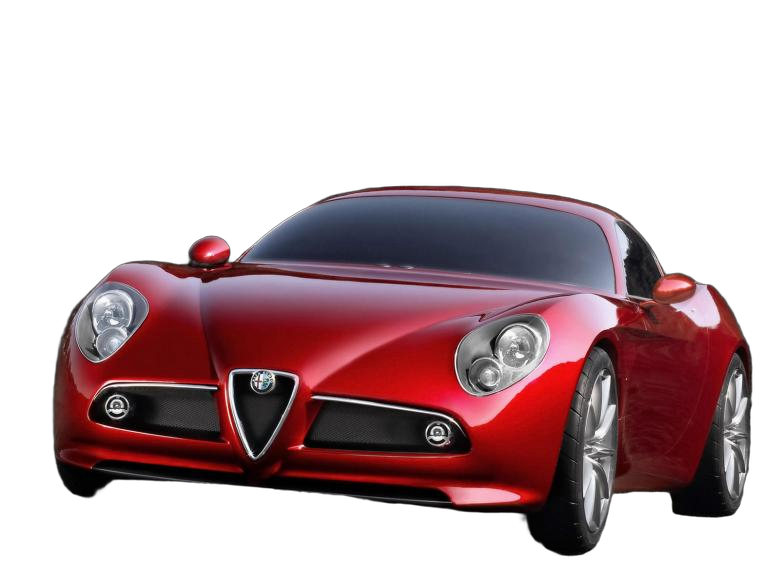

In [66]:
im1 = Image.open(input_path)
im1 = remove_bg(im1)
im1

In [67]:
im2 = Image.open(r"C:\Users\abba\Downloads\istockphoto-689819118-612x612.jpg").convert('RGBA')
im2 = im2.resize(im1.size)
im2.size

(780, 585)

In [68]:
1920*2, 1080*2

(3840, 2160)

(780, 585) (780, 585)


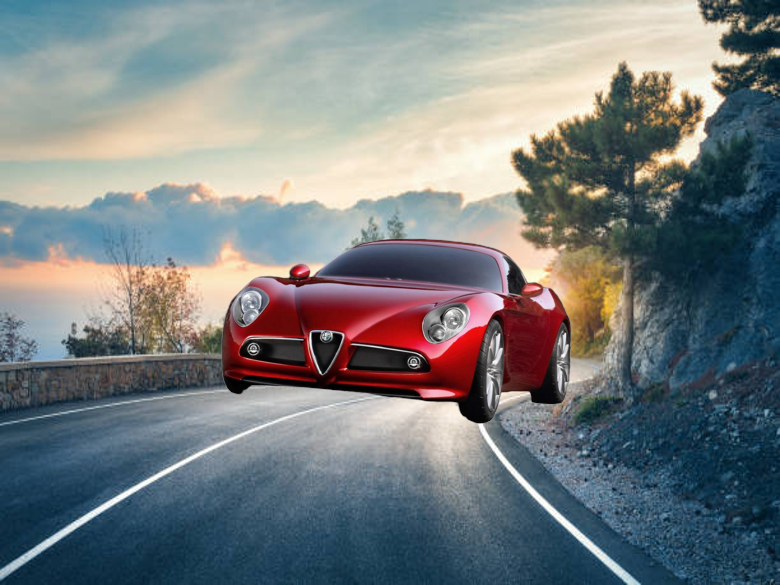

In [69]:
from PIL import Image

def superimpose_with_resize(background: Image.Image, overlay: Image.Image) -> Image.Image:
    # Ensure both images have alpha channels
    background = background.convert("RGBA")#.resize([3840, 720])
    background.thumbnail([1920, 1080])
    overlay = overlay.convert("RGBA")
    overlay.thumbnail([1920, 1080])


    # Get areas
    bg_width, bg_height = background.size
    ov_width, ov_height = overlay.size

    bg_area = bg_width * bg_height
    ov_area = ov_width * ov_height

    print(background.size, overlay.size)

    # Check if overlay area > 50% of background
    if ov_area > 0.5 * bg_area:
        # Resize overlay to 25% of its original size
        overlay = overlay.resize((ov_width // 2, ov_height // 2))

    # Center the overlay on the background
    ov_width, ov_height = overlay.size
    position = ((bg_width - ov_width) // 2, (bg_height - ov_height) // 2)

    # Paste the overlay
    result = background.copy()
    result.paste(overlay, position, overlay)

    return result

superimpose_with_resize(im2, im1)

In [ ]:
from PIL import Image

def paste_logo(base_image, logo_image, position, margin=10):
    w,h = base_image.size
    logo_image = logo_image.resize([int(w*0.1), int(h*0.1)]).convert('RGBA')
    result_image = base_image.copy()

    # Get dimensions
    base_w, base_h = result_image.size
    logo_w, logo_h = logo_image.size

    # Determine coordinates
    if position == 'top-left':
        pos = (margin, margin)
    elif position == 'top-right':
        pos = (base_w - logo_w - margin, margin)
    elif position == 'bottom-left':
        pos = (margin, base_h - logo_h - margin)
    elif position == 'bottom-right':
        pos = (base_w - logo_w - margin, base_h - logo_h - margin)
    else:
        raise ValueError("Position must be one of: 'top-left', 'top-right', 'bottom-left', 'bottom-right'")

    # Paste with transparency if available
    if logo_image.mode in ("RGBA", "LA"):
        result_image.paste(logo_image, pos, logo_image)
    else:
        result_image.paste(logo_image, pos)

    return result_image


In [ ]:
from PIL import Image

# Load your images
image_a = Image.open('preview16.jpg')
# image_a = remove_bg(image_a)
image_b = Image.open('logo.png')
# image_b = remove_bg(image_b)

# Apply to top-right corner
result = paste_logo(image_a, image_b, 'top-right')

(78, 58)


In [ ]:
from ultralytics import YOLO
import cv2

license_plate_detector = YOLO(r"C:\Users\abba\Downloads\license_plate_detector.pt")

In [96]:
im = Image.open(r"C:\Users\abba\Downloads\cover_14.jpeg")
im = im.resize( [640, 640])
pred=license_plate_detector(im,imgsz=640)


0: 640x640 1 license_plate, 244.3ms
Speed: 9.9ms preprocess, 244.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [100]:
data = pred[0].boxes.data.numpy()
im=pred[0].orig_img
for bbox in data:
    x, y, w, h, _, _ = bbox.astype(int)
    if bbox[-2] >0.6:
        im[y:h, x:w] = 0

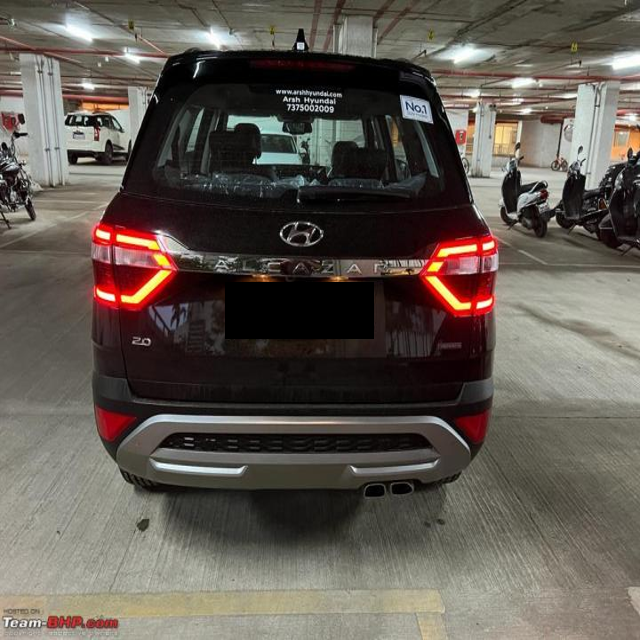

In [101]:
Image.fromarray(im[...,::-1])

In [146]:
!pip install runwayml --user

  Obtaining dependency information for runwayml from https://files.pythonhosted.org/packages/41/7f/2dc78118416559ca3d20bdec9bccb3ee7f02a353de0f3367b7aea3a5e142/runwayml-3.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/83.1 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/83.1 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/83.1 kB ? eta -:--:--
   ---------------------------------------- 83.1/83.1 kB 583.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import time
from runwayml import RunwayML

client = RunwayML()

task = client.text_to_image.create(
  model='gen4_image',
  ratio='1920:1080',
  prompt_text='A beautifully blended version of both images, try to keep both image original',
  reference_images=[
    {
      'uri': 'https://i.ibb.co/sv9cqdCz/1-qre-g-AVNTuaza-UPv-Nw2w-Q.webp',
      'tag': 'car_image',
    },
    {
      'uri': 'https://i.ibb.co/1tknkDMt/1000-F-278520748-G9s-RQd-SValj67-Hihmt4r3ji6-SLRT3-Vi-A.webp',
      'tag': 'bg_image',
    },
  ],
)
task_id = task.id

# Poll the task until it's complete
time.sleep(1)  # Wait for a second before polling
task = client.tasks.retrieve(task_id)
while task.status not in ['SUCCEEDED', 'FAILED']:
  time.sleep(1)  # Wait for a second before polling
  task = client.tasks.retrieve(task_id)

print('Task complete:', task)
print('Image URL: ', task.output[0])

BadRequestError: Error code: 400 - {'error': 'You do not have enough credits to run this task.', 'docUrl': 'https://docs.dev.runwayml.com/api'}